Visualizations

Logistic Regression, LDA, Decision Tree


Each subject has 6 AuC values per test

12 Subjects

6 Events

3 Algorithms

Types of Graphs 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [39]:

#loading in our shit
df_prabesh = pd.read_csv('Prabesh_results_Decision_Tree.csv')
df_mina = pd.read_csv('Mina_results.csv')
df_shae = pd.read_csv('Shae_Results_knearest.csv')

#concating all our shit
dfs = [df_prabesh, df_mina, df_shae]
df_all = pd.concat(dfs)
#renaming columns
df_all.columns = ["a","Subject","Classifier", "AUC_Score"]
#dropping extra column
df_all.drop(['a'], axis=1, inplace = True)



#AUC cell was a string which needed to be a list of floats instead
def AUC_Formatting(cell):
    #remove certain characters from string
    cell = cell.replace('[', '')
    cell = cell.replace(']', '')
    #create new list
    list_a = []
    #split string by commas and create list from values
    for i in cell.split(','):
        i = float(i)
        list_a.append(i)
    return(list_a)

df_all["AUC_Score"] = df_all["AUC_Score"].apply(AUC_Formatting)    
    
df_all[['Event1','Event2','Event3','Event4','Event5','Event6']] = pd.DataFrame(df_all.AUC_Score.values.tolist(), index= df_all.index)    

#df_decision = df_all.copy()
#df_LR = df_all.copy()
#df_LDA = df_all.copy()

#Too lazy to find an easier way to do this but creating dataframes for each of the algorithms
a = ['LDA', "Logistic Regression",'K-nearest Neighbors']
df_decision = df_all[~df_all['Classifier'].isin(a)]
b = ['LDA', "Decision Tree",'K-nearest Neighbors']
df_LR = df_all[~df_all['Classifier'].isin(b)]
c = ['Decision Tree', "Logistic Regression",'K-nearest Neighbors']
df_LDA = df_all[~df_all['Classifier'].isin(c)]
d = ['Decision Tree', "Logistic Regression",'LDA']
df_k = df_all[~df_all['Classifier'].isin(d)]




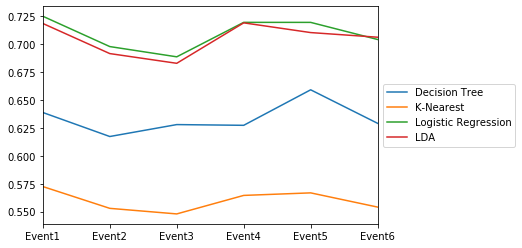

In [74]:
#Actually Graphing stuff
events = ['Event1','Event2','Event3','Event4','Event5','Event6']

#Calculating means of all of the methods

#Decision Tree
mean_decision = []
for event in events:
    event = df_decision[event].mean()
    mean_decision.append(event)
    
#Logistic Regression
mean_LR = []
for event in events:
    event = df_LR[event].mean()
    mean_LR.append(event)

#LDA
mean_LDA = []
for event in events:
    event = df_LDA[event].mean()
    mean_LDA.append(event)

#K-nearest
mean_k = []
for event in events:
    event = df_k[event].mean()
    mean_k.append(event)

means = [mean_decision, mean_k, mean_LR, mean_LDA] 
#classifiers = ['Decision Tree', 'K-Nearest', 'Logistic Regression', 'LDA']

#creating dataframe of all of the means
    
df_all_means = pd.DataFrame(means, index =['Decision Tree', 'K-Nearest', 'Logistic Regression', 'LDA'], 
                                              columns =['Event1','Event2','Event3','Event4','Event5','Event6'])
#df_all_means['Classifier'] = classifiers
#df_all_means.plot()
#df_all_means.plot(['Event1','Event2','Event3','Event4','Event5','Event6'],'Classifier',kind = 'line')
df_all_means_T = df_all_means.T
df_all_means_T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#df_all_means_T


In [62]:
#fig=pd.plotting.scatter_matrix(df_all_means)
df_all_means

,Event1,Event2,Event3,Event4,Event5,Event6
Decision Tree,0.638635,0.617162,0.627826,0.627172,0.658919,0.628948
K-Nearest,0.572431,0.552945,0.547964,0.564507,0.566777,0.554066
Logistic Regression,0.724681,0.697568,0.688406,0.719219,0.719194,0.703894
LDA,0.718225,0.691300,0.682613,0.718769,0.710082,0.705928
